In [1]:
!pip install yfinance pandas numpy scikit-learn tensorflow matplotlib joblib

In [22]:
import pandas as pd
import numpy as np
import yfinance as yf
!pip install --upgrade yfinance



In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit



In [7]:
import warnings
warnings.filterwarnings('ignore')b

In [37]:
import pandas as pd

file_path = 'archive/all_stocks_5yr.csv'

df = pd.read_csv(file_path)

print(df.head())


         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [39]:
df = pd.read_csv('archive/all_stocks_5yr.csv')  
df['date'] = pd.to_datetime(df['date'])  
df.set_index('date', inplace=True)       
df.sort_index(inplace=True)             
df.head()


,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.1200,14.630,14.75,8407500,AAL
2013-02-08,81.22,81.9300,80.940,81.89,296853,SLG
2013-02-08,78.24,79.0700,78.125,79.07,4632684,SLB
2013-02-08,236.64,238.6924,235.750,238.16,552207,BLK
2013-02-08,89.04,89.4800,88.910,89.16,554948,SJM


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from datetime import datetime


In [10]:
os.environ['PYTHONHASHSEED'] = '0'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


In [11]:
# Define Your Stock List 
top_20_indian_stocks = [
    'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS',
    'HINDUNILVR.NS', 'SBIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'WIPRO.NS',
    'BHARTIARTL.NS', 'ITC.NS', 'HCLTECH.NS', 'ASIANPAINT.NS', 'LT.NS',
    'AXISBANK.NS', 'MARUTI.NS', 'DMART.NS', 'ULTRACEMCO.NS', 'TITAN.NS'
]

In [12]:
# Download Fresh Data from Yahoo Finance 
print("Downloading fresh data from Yahoo Finance...")
start_date = "2015-01-01"
end_date = datetime.now().strftime('%Y-%m-%d')

data = yf.download(top_20_indian_stocks, start=start_date, end=end_date)

/var/folders/77/7l14d5v97qzct7c0yxlqb2xr0000gn/T/ipykernel_28980/2531652665.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(top_20_indian_stocks, start=start_date, end=end_date)
[*********************100%***********************]  20 of 20 completed


In [13]:
# Reformat the data into the structure our script needs
df = data.stack().reset_index()
df.rename(columns={
    'Date': 'date',
    'Ticker': 'Name',  
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume'
}, inplace=True)

print(f"✅ Successfully downloaded data for {len(df['Name'].unique())} stocks.")
print(df.head())

✅ Successfully downloaded data for 20 stocks.
Price       date           Name       close        high         low  \
0     2015-01-01  ASIANPAINT.NS  687.201965  692.109545  685.229729   
1     2015-01-01    AXISBANK.NS  486.962860  487.882492  483.090777   
2     2015-01-01  BAJFINANCE.NS   33.804058   34.000138   33.468886   
3     2015-01-01  BHARTIARTL.NS  308.073608  309.771457  298.523255   
4     2015-01-01     HCLTECH.NS  305.247986  306.169348  301.220553   

Price        open     volume  
0      688.990673   284935.0  
1      486.575658  1351985.0  
2       33.651926   756600.0  
3      300.857787  2460188.0  
4      303.766190  1336492.0  


/var/folders/77/7l14d5v97qzct7c0yxlqb2xr0000gn/T/ipykernel_28980/2468848808.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = data.stack().reset_index()


In [3]:
# Main Loop to Train a Model for Each Stock 
os.makedirs('trained_models', exist_ok=True)
for ticker in top_20_indian_stocks:
    print(f"\n{'='*50}")
    print(f"🚀 Starting process for ticker: {ticker}")
    print(f"{'='*50}")

    stock_df = df[df['Name'] == ticker].copy()
    stock_df.set_index('date', inplace=True)

    if stock_df.empty or stock_df['close'].isnull().any():
        print(f"⚠️ Data for ticker '{ticker}' is empty or contains null values. Skipping.")
        continue




🚀 Starting process for ticker: RELIANCE.NS

🚀 Starting process for ticker: TCS.NS

🚀 Starting process for ticker: HDFCBANK.NS

🚀 Starting process for ticker: INFY.NS

🚀 Starting process for ticker: ICICIBANK.NS

🚀 Starting process for ticker: HINDUNILVR.NS

🚀 Starting process for ticker: SBIN.NS

🚀 Starting process for ticker: BAJFINANCE.NS

🚀 Starting process for ticker: KOTAKBANK.NS

🚀 Starting process for ticker: WIPRO.NS

🚀 Starting process for ticker: BHARTIARTL.NS

🚀 Starting process for ticker: ITC.NS

🚀 Starting process for ticker: HCLTECH.NS

🚀 Starting process for ticker: ASIANPAINT.NS

🚀 Starting process for ticker: LT.NS

🚀 Starting process for ticker: AXISBANK.NS

🚀 Starting process for ticker: MARUTI.NS

🚀 Starting process for ticker: DMART.NS

🚀 Starting process for ticker: ULTRACEMCO.NS

🚀 Starting process for ticker: TITAN.NS


In [5]:


    #  Data Splitting 
    split_point = int(len(stock_df) * 0.8)
    trainingData = stock_df.iloc[:split_point]
    testingData = stock_df.iloc[split_point:]

    trainprice = trainingData['close'].values.reshape(-1, 1)
    testprice = testingData['close'].values.reshape(-1, 1)

    n_steps = 20
    if len(testprice) < n_steps:
        print(f"⚠️ Not enough test data for '{ticker}' to create sequences. Skipping.")
        continue

    # Scaling and Sequence Creation 
    sc = MinMaxScaler(feature_range=(0, 1))
    trainDataScaled = sc.fit_transform(trainprice)
    testDataScaled = sc.transform(testprice)

    def create_sequences(data, steps):
        X, y = [], []
        for i in range(steps, len(data)):
            X.append(data[i-steps:i, 0])
            y.append(data[i, 0])
        return np.array(X), np.array(y)

    xTrain, yTrain = create_sequences(trainDataScaled, n_steps)
    xTest, yTest = create_sequences(testDataScaled, n_steps)

    xTrain = np.reshape(xTrain, (xTrain.shape[0], xTrain.shape[1], 1))
    xTest = np.reshape(xTest, (xTest.shape[0], xTest.shape[1], 1))

    # Build and Train Model 
    print(f"Building and training model for {ticker}...")
    model = Sequential([
        LSTM(units=200, return_sequences=True, input_shape=(xTrain.shape[1], 1)),
        Dropout(0.2),
        LSTM(units=200, return_sequences=True),
        Dropout(0.2),
        LSTM(units=200, return_sequences=False),
        Dropout(0.2),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(xTrain, yTrain, epochs=50, batch_size=128, verbose=0)
    print(f"✅ Model for {ticker} trained successfully.")

    # Save the Trained Model 
    model_save_path = f'trained_models/lstm_model_{ticker}.keras'
    model.save(model_save_path)
    print(f"💾 Model saved to: {model_save_path}")

    # Evaluate and Print Metrics 
    predictions = model.predict(xTest, verbose=0)
    actual_prices = sc.inverse_transform(yTest.reshape(-1, 1))
    predicted_prices = sc.inverse_transform(predictions)

    r2 = r2_score(actual_prices, predicted_prices)
    rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

    print(f"\n----- Metrics for {ticker} -----")
    print(f"RMSE: ₹{rmse:.2f}")
    print(f"R-squared: {r2:.2%}")
    print("----------------------------\n")



/var/folders/77/7l14d5v97qzct7c0yxlqb2xr0000gn/T/ipykernel_28980/1322278324.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(top_20_indian_stocks, start=start_date, end=end_date)
[************          25%                       ]  5 of 20 completed

[*********************100%***********************]  20 of 20 completed
/var/folders/77/7l14d5v97qzct7c0yxlqb2xr0000gn/T/ipykernel_28980/1322278324.py:37: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = data.stack().reset_index()
2025-08-16 15:36:57.581230: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-08-16 15:36:57.581593: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-08-16 15:36:57.582742: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-08-16 15:36:57.582814: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-16 15:36:57.58

✅ Successfully downloaded data for 20 stocks.
Price       date           Name       close        high         low  \
0     2015-01-01  ASIANPAINT.NS  687.201965  692.109545  685.229729   
1     2015-01-01    AXISBANK.NS  486.962860  487.882492  483.090777   
2     2015-01-01  BAJFINANCE.NS   33.804058   34.000138   33.468886   
3     2015-01-01  BHARTIARTL.NS  308.073608  309.771457  298.523255   
4     2015-01-01     HCLTECH.NS  305.247986  306.169348  301.220553   

Price        open     volume  
0      688.990673   284935.0  
1      486.575658  1351985.0  
2       33.651926   756600.0  
3      300.857787  2460188.0  
4      303.766190  1336492.0  

🚀 Starting process for ticker: RELIANCE.NS
Building and training model for RELIANCE.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-08-16 15:36:58.495581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


✅ Model for RELIANCE.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_RELIANCE.NS.keras

----- Metrics for RELIANCE.NS -----
RMSE: ₹53.19
R-squared: 80.20%
----------------------------


🚀 Starting process for ticker: TCS.NS
Building and training model for TCS.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for TCS.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_TCS.NS.keras

----- Metrics for TCS.NS -----
RMSE: ₹112.43
R-squared: 90.54%
----------------------------


🚀 Starting process for ticker: HDFCBANK.NS
Building and training model for HDFCBANK.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for HDFCBANK.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_HDFCBANK.NS.keras

----- Metrics for HDFCBANK.NS -----
RMSE: ₹64.62
R-squared: 86.10%
----------------------------


🚀 Starting process for ticker: INFY.NS
Building and training model for INFY.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for INFY.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_INFY.NS.keras

----- Metrics for INFY.NS -----
RMSE: ₹51.28
R-squared: 92.88%
----------------------------


🚀 Starting process for ticker: ICICIBANK.NS
Building and training model for ICICIBANK.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for ICICIBANK.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_ICICIBANK.NS.keras

----- Metrics for ICICIBANK.NS -----
RMSE: ₹40.52
R-squared: 94.19%
----------------------------


🚀 Starting process for ticker: HINDUNILVR.NS
Building and training model for HINDUNILVR.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for HINDUNILVR.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_HINDUNILVR.NS.keras

----- Metrics for HINDUNILVR.NS -----
RMSE: ₹52.49
R-squared: 89.85%
----------------------------


🚀 Starting process for ticker: SBIN.NS
Building and training model for SBIN.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for SBIN.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_SBIN.NS.keras

----- Metrics for SBIN.NS -----
RMSE: ₹33.15
R-squared: 88.48%
----------------------------


🚀 Starting process for ticker: BAJFINANCE.NS
Building and training model for BAJFINANCE.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for BAJFINANCE.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_BAJFINANCE.NS.keras

----- Metrics for BAJFINANCE.NS -----
RMSE: ₹27.04
R-squared: 90.88%
----------------------------


🚀 Starting process for ticker: KOTAKBANK.NS
Building and training model for KOTAKBANK.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for KOTAKBANK.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_KOTAKBANK.NS.keras

----- Metrics for KOTAKBANK.NS -----
RMSE: ₹52.00
R-squared: 88.01%
----------------------------


🚀 Starting process for ticker: WIPRO.NS
Building and training model for WIPRO.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for WIPRO.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_WIPRO.NS.keras

----- Metrics for WIPRO.NS -----
RMSE: ₹7.38
R-squared: 94.37%
----------------------------


🚀 Starting process for ticker: BHARTIARTL.NS
Building and training model for BHARTIARTL.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for BHARTIARTL.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_BHARTIARTL.NS.keras

----- Metrics for BHARTIARTL.NS -----
RMSE: ₹132.57
R-squared: 84.78%
----------------------------


🚀 Starting process for ticker: ITC.NS
Building and training model for ITC.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for ITC.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_ITC.NS.keras

----- Metrics for ITC.NS -----
RMSE: ₹11.30
R-squared: 84.13%
----------------------------


🚀 Starting process for ticker: HCLTECH.NS
Building and training model for HCLTECH.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for HCLTECH.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_HCLTECH.NS.keras

----- Metrics for HCLTECH.NS -----
RMSE: ₹66.22
R-squared: 90.98%
----------------------------


🚀 Starting process for ticker: ASIANPAINT.NS
Building and training model for ASIANPAINT.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for ASIANPAINT.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_ASIANPAINT.NS.keras

----- Metrics for ASIANPAINT.NS -----
RMSE: ₹88.09
R-squared: 94.11%
----------------------------


🚀 Starting process for ticker: LT.NS
Building and training model for LT.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for LT.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_LT.NS.keras

----- Metrics for LT.NS -----
RMSE: ₹79.49
R-squared: 92.61%
----------------------------


🚀 Starting process for ticker: AXISBANK.NS
Building and training model for AXISBANK.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for AXISBANK.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_AXISBANK.NS.keras

----- Metrics for AXISBANK.NS -----
RMSE: ₹30.05
R-squared: 87.87%
----------------------------


🚀 Starting process for ticker: MARUTI.NS
Building and training model for MARUTI.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for MARUTI.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_MARUTI.NS.keras

----- Metrics for MARUTI.NS -----
RMSE: ₹358.22
R-squared: 87.63%
----------------------------


🚀 Starting process for ticker: DMART.NS
Building and training model for DMART.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for DMART.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_DMART.NS.keras

----- Metrics for DMART.NS -----
RMSE: ₹163.88
R-squared: 89.64%
----------------------------


🚀 Starting process for ticker: ULTRACEMCO.NS
Building and training model for ULTRACEMCO.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for ULTRACEMCO.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_ULTRACEMCO.NS.keras

----- Metrics for ULTRACEMCO.NS -----
RMSE: ₹652.85
R-squared: 73.44%
----------------------------


🚀 Starting process for ticker: TITAN.NS
Building and training model for TITAN.NS...


/Users/waheed/miniconda3/envs/ml-main/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model for TITAN.NS trained successfully.
💾 Model saved to: trained_models/lstm_model_TITAN.NS.keras

----- Metrics for TITAN.NS -----
RMSE: ₹99.99
R-squared: 77.09%
----------------------------



/var/folders/77/7l14d5v97qzct7c0yxlqb2xr0000gn/T/ipykernel_30386/1798567405.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(top_20_indian_stocks, start=start_date, end=end_date, progress=False, group_by='ticker')


✅ Successfully downloaded data for 20 stocks.
--- Processing RELIANCE.NS (1/20) ---
--- Processing TCS.NS (2/20) ---
--- Processing HDFCBANK.NS (3/20) ---
--- Processing INFY.NS (4/20) ---
--- Processing ICICIBANK.NS (5/20) ---
--- Processing HINDUNILVR.NS (6/20) ---
--- Processing SBIN.NS (7/20) ---
--- Processing BAJFINANCE.NS (8/20) ---
--- Processing KOTAKBANK.NS (9/20) ---
--- Processing WIPRO.NS (10/20) ---
--- Processing BHARTIARTL.NS (11/20) ---
--- Processing ITC.NS (12/20) ---
--- Processing HCLTECH.NS (13/20) ---
--- Processing ASIANPAINT.NS (14/20) ---
--- Processing LT.NS (15/20) ---
--- Processing AXISBANK.NS (16/20) ---
--- Processing MARUTI.NS (17/20) ---
--- Processing DMART.NS (18/20) ---
--- Processing ULTRACEMCO.NS (19/20) ---
--- Processing TITAN.NS (20/20) ---


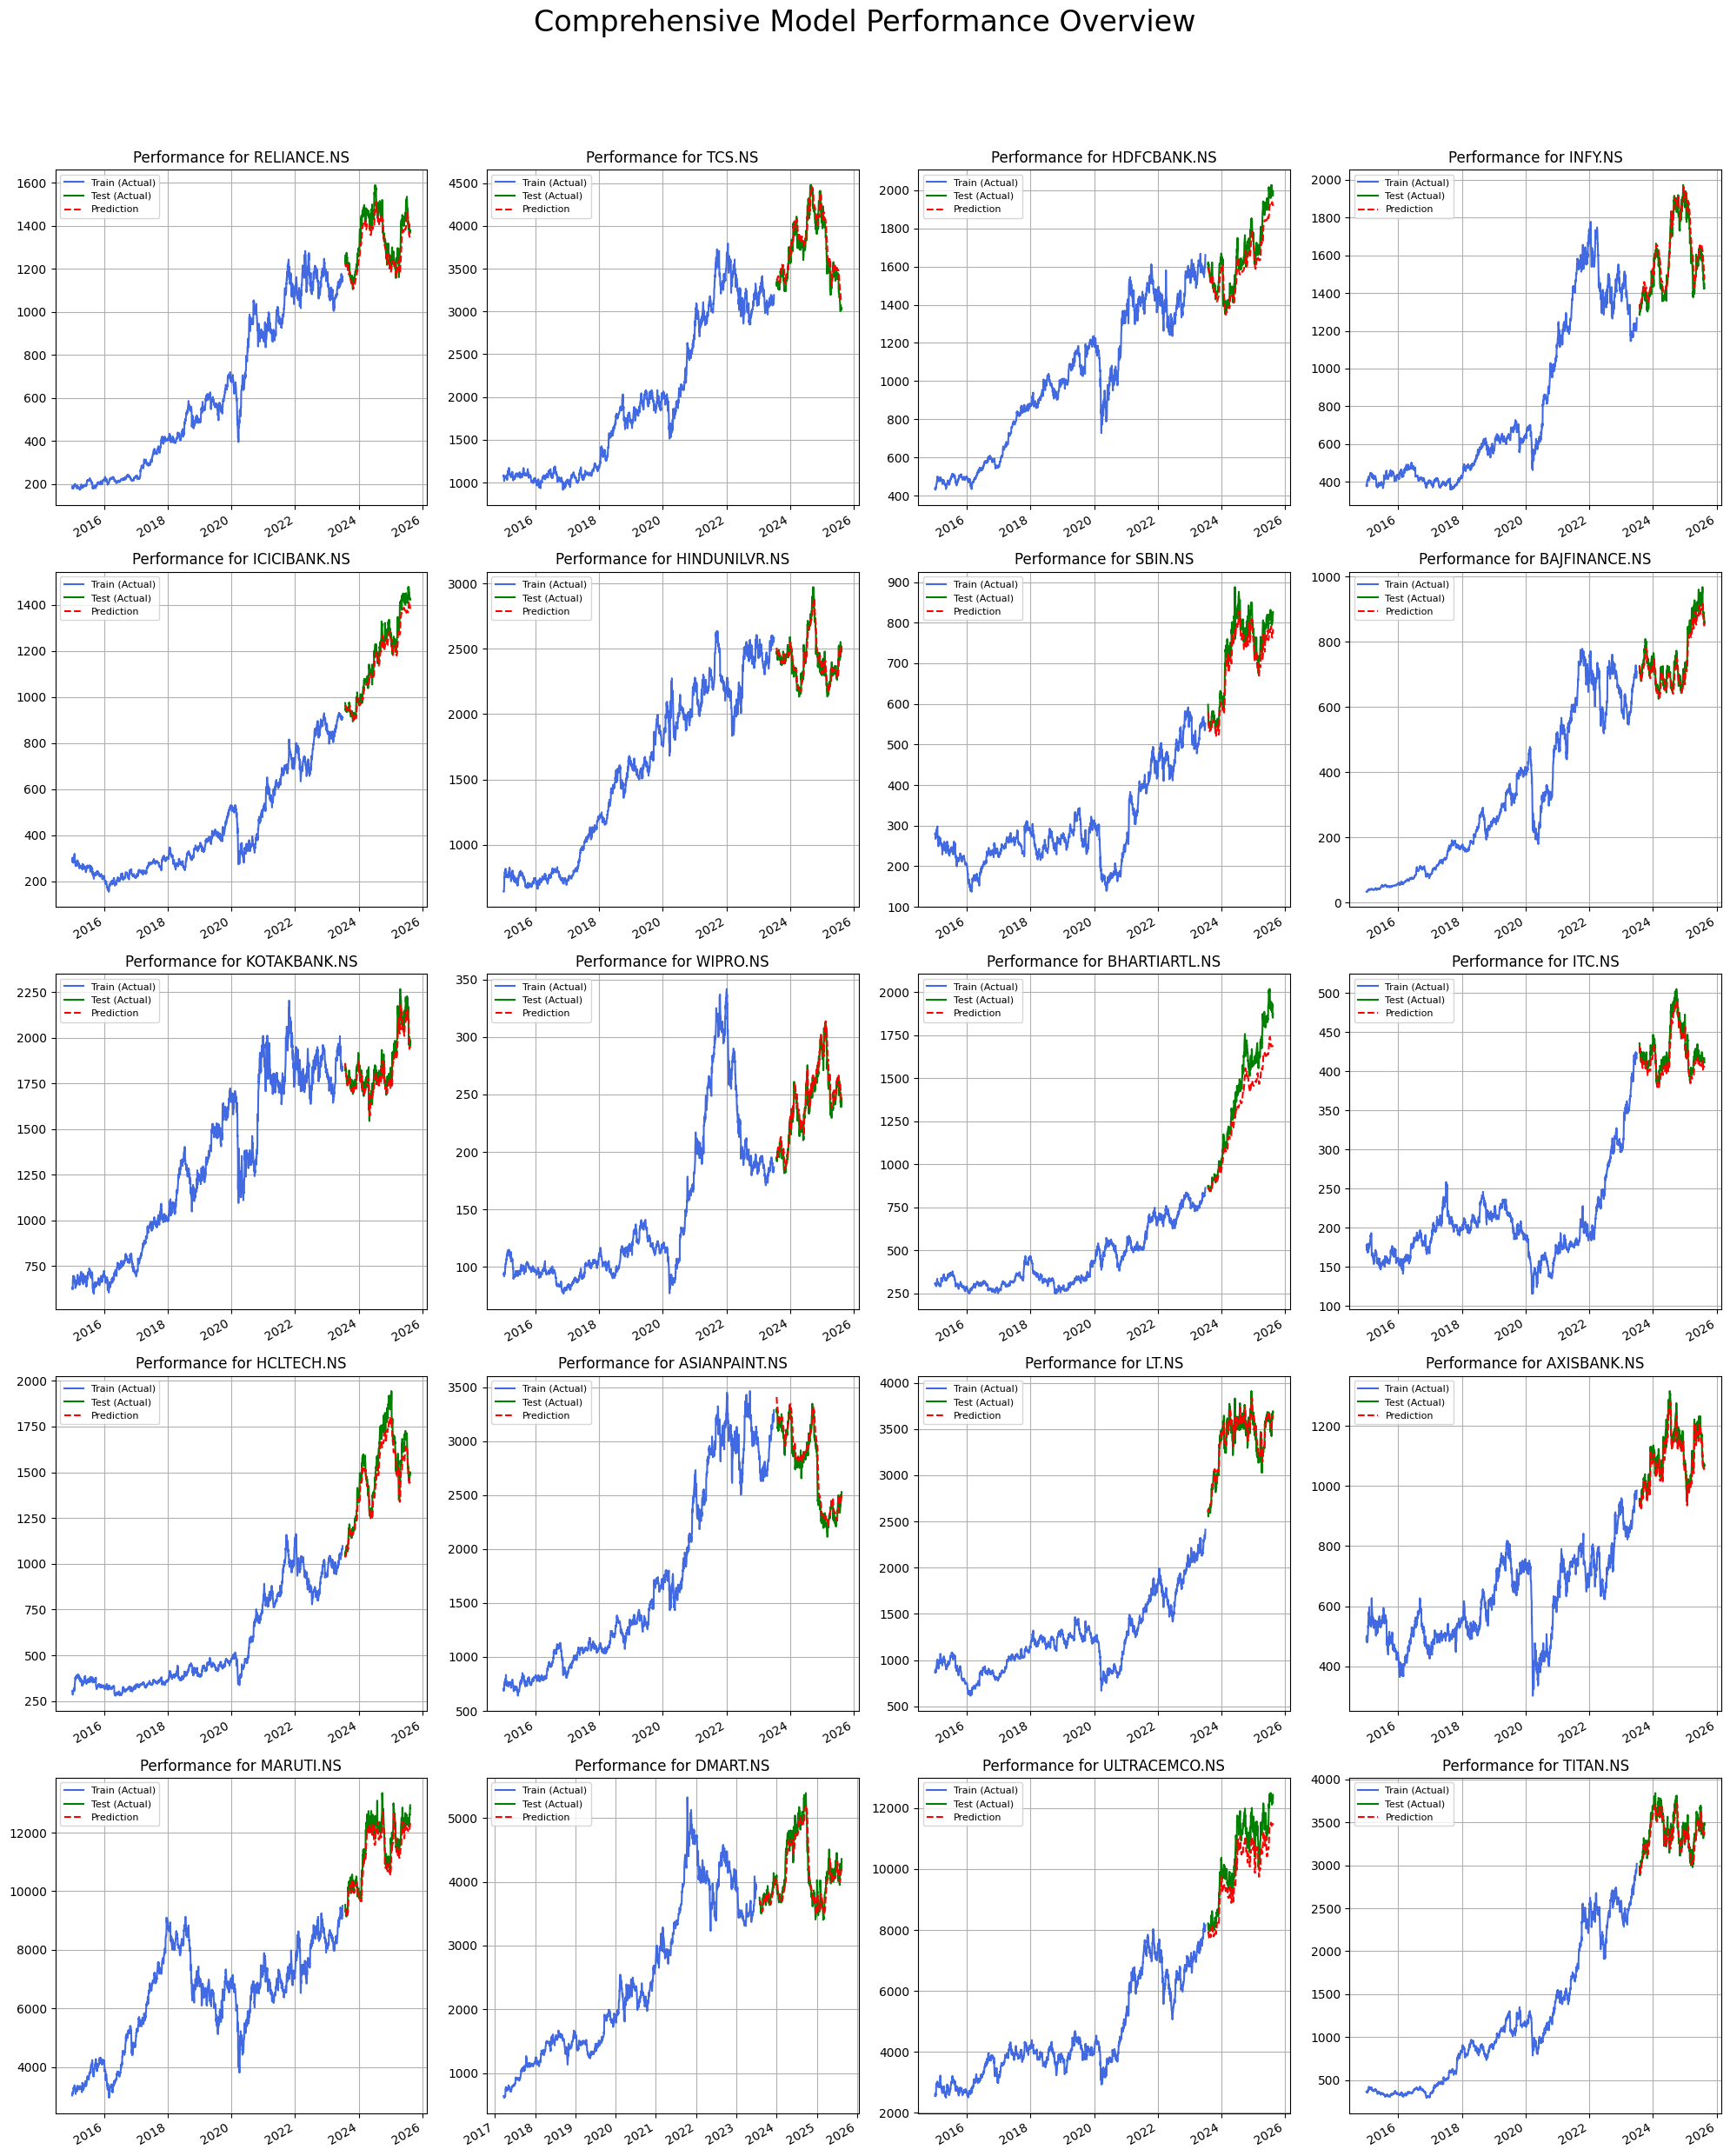

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from datetime import datetime
import math

# Stocks
top_20_indian_stocks = [
    'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS',
    'HINDUNILVR.NS', 'SBIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'WIPRO.NS',
    'BHARTIARTL.NS', 'ITC.NS', 'HCLTECH.NS', 'ASIANPAINT.NS', 'LT.NS',
    'AXISBANK.NS', 'MARUTI.NS', 'DMART.NS', 'ULTRACEMCO.NS', 'TITAN.NS'
]

#  Download Fresh Data from Yahoo Finance 
print("Downloading historical data from Yahoo Finance to generate graphs...")
start_date = "2015-01-01"
end_date = datetime.now().strftime('%Y-%m-%d')

data = yf.download(top_20_indian_stocks, start=start_date, end=end_date, progress=False, group_by='ticker')

# Reformat the data into the structure our script needs
df_list = []
for ticker in top_20_indian_stocks:
    temp_df = data[ticker].copy()
    temp_df['Name'] = ticker
    df_list.append(temp_df)
df = pd.concat(df_list).reset_index()

df.rename(columns={
    'Date': 'date',
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume'
}, inplace=True)


if df.empty:
    print("❌ Error: Could not download data. Please check your internet connection or stock tickers.")
else:
    print(f"✅ Successfully downloaded data for {len(df['Name'].unique())} stocks.")
    

    # Create a 5x4 grid of subplots for the 20 stocks
    fig, axes = plt.subplots(5, 4, figsize=(20, 25))
    axes = axes.flatten() 
    
    plot_count = 0 # To keep track of which subplot to use

    # Main Loop to Load Model, Predict, and Plot 
    for i, ticker in enumerate(top_20_indian_stocks):
        print(f"--- Processing {ticker} ({i+1}/20) ---")

        model_path = f'trained_models/lstm_model_{ticker}.keras'
        
        if not os.path.exists(model_path):
            print(f"⚠️ Model for {ticker} not found. Skipping.")
            continue
            
        model = load_model(model_path)
        
        stock_df = df[df['Name'] == ticker].copy()
        stock_df.set_index('date', inplace=True)

        split_point = int(len(stock_df) * 0.8)
        training_data = stock_df.iloc[:split_point]
        testing_data = stock_df.iloc[split_point:]

        train_prices = training_data['close'].values.reshape(-1, 1)
        test_prices = testing_data['close'].values.reshape(-1, 1)

        n_steps = 20
        if len(test_prices) < n_steps:
            print(f"⚠️ Not enough test data for '{ticker}'. Skipping.")
            continue

        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(train_prices)
        test_data_scaled = scaler.transform(test_prices)

        def create_sequences(data, steps):
            X = []
            for i in range(steps, len(data)):
                X.append(data[i-steps:i, 0])
            return np.array(X)

        x_test = create_sequences(test_data_scaled, n_steps)
        x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

        predictions_scaled = model.predict(x_test, verbose=0)
        predicted_prices = scaler.inverse_transform(predictions_scaled)

        testing_data_with_preds = testing_data.iloc[n_steps:].copy()
        testing_data_with_preds['Prediction'] = predicted_prices

        #  Plot on the designated subplot 
        ax = axes[plot_count]
        ax.set_title(f'Performance for {ticker}', fontsize=12)
        ax.plot(training_data.index, training_data['close'], label='Train (Actual)', color='royalblue')
        ax.plot(testing_data_with_preds.index, testing_data_with_preds['close'], label='Test (Actual)', color='green')
        ax.plot(testing_data_with_preds.index, testing_data_with_preds['Prediction'], label='Prediction', color='red', linestyle='--')
        ax.legend(fontsize=8)
        ax.grid(True)
        
        # Rotate x-axis labels for better readability
        for label in ax.get_xticklabels():
            label.set_rotation(30)
            label.set_ha('right')
        
        plot_count += 1

    # Finalize and Show the Grid 
    # Hide any unused subplots if some stocks were skipped
    for i in range(plot_count, len(axes)):
        axes[i].axis('off')
        
    fig.suptitle('Comprehensive Model Performance Overview', fontsize=24, y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to make room for suptitle
    
    #  NEW: Save the figure to an image file 
    plt.savefig('all_stock_plots.png', dpi=300, bbox_inches='tight')
    
    plt.show()

